# VGG16 Pre-defined Model Approach

In [37]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import random
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for path in tqdm(image_paths, desc="Loading and preprocessing images"):
        img = image.load_img(path, target_size=(512,512))
        img = image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Function to extract features using a pre-trained VGG16 model
def extract_features(images):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
    features = []
    for img in tqdm(images, desc="Extracting features using VGG16"):
        feature = model.predict(np.expand_dims(img, axis=0))
        features.append(feature.flatten())
    return np.array(features)

# Function to perform Isomap dimensionality reduction
def perform_isomap(features):
    isomap = Isomap(n_components=2)
    embeddings = isomap.fit_transform(features)
    return embeddings

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.015, alpha = 1)
    
# Function to plot the embeddings
def plot_embeddings(embeddings, image_paths, title='Isomap Clustering', thumbnail_size=(64,64), num_samples=10, w=100):
    fig, ax = plt.subplots(figsize=(10,10), dpi=200)
    selected_indices = random.sample(range(len(image_paths)), num_samples)
    ax.scatter(embeddings[:, 0], embeddings[:, 1], s=3, color='lightgrey')
    for i in selected_indices:
        ab = AnnotationBbox(getImage(image_paths[i]), (embeddings[i,0], embeddings[i,1]), frameon=False)
        ax.add_artist(ab)
        # img = Image.open(image_paths[i])
        # img.thumbnail(thumbnail_size)
        # plt.imshow(img, extent=(embeddings[i, 0] - w/2, embeddings[i, 0] + w/2, embeddings[i, 1]-w/2, embeddings[i, 1] + w/2), aspect='auto')
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    plt.savefig('isomap.png', bbox_inches='tight')
    plt.show()

In [38]:
image_dir = '../data/sodankyla_cam/pine_ground_cam/'

image_paths_curated = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg') and filename.split('_')[-1][:2] in ['10', '11', '12', '13', '14']]
image_paths_curated.sort()

# Load and preprocess images
images_curated = load_and_preprocess_images(image_paths_curated)

Loading and preprocessing images: 100%|████████████████████████████████████████████| 3640/3640 [02:37<00:00, 23.05it/s]


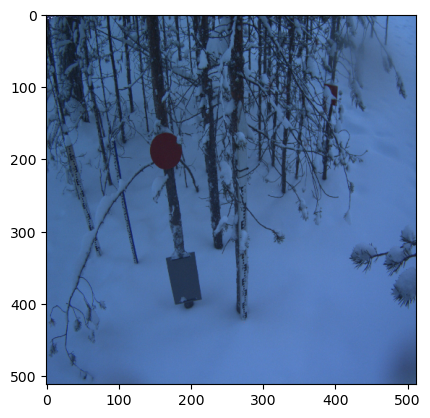

In [46]:
# (images_curated[0] - images_curated[0].min())/(images_curated[0].max() - images_curated[0].min())
plt.imshow(images_curated[0].astype(int))
# images_curated[0]
# images_curated[0].shape

In [2]:
# # Extract features using VGG16
# features = extract_features(images_curated)

In [3]:
# # Perform Isomap dimensionality reduction
# embeddings = perform_isomap(features)

In [14]:
# np.save('features.npy', features)
# np.save('embeddings.npy', embeddings)

features = np.load('../data/unet_experiment/features.npy')
embeddings = np.load('../data/unet_experiment/embeddings.npy')

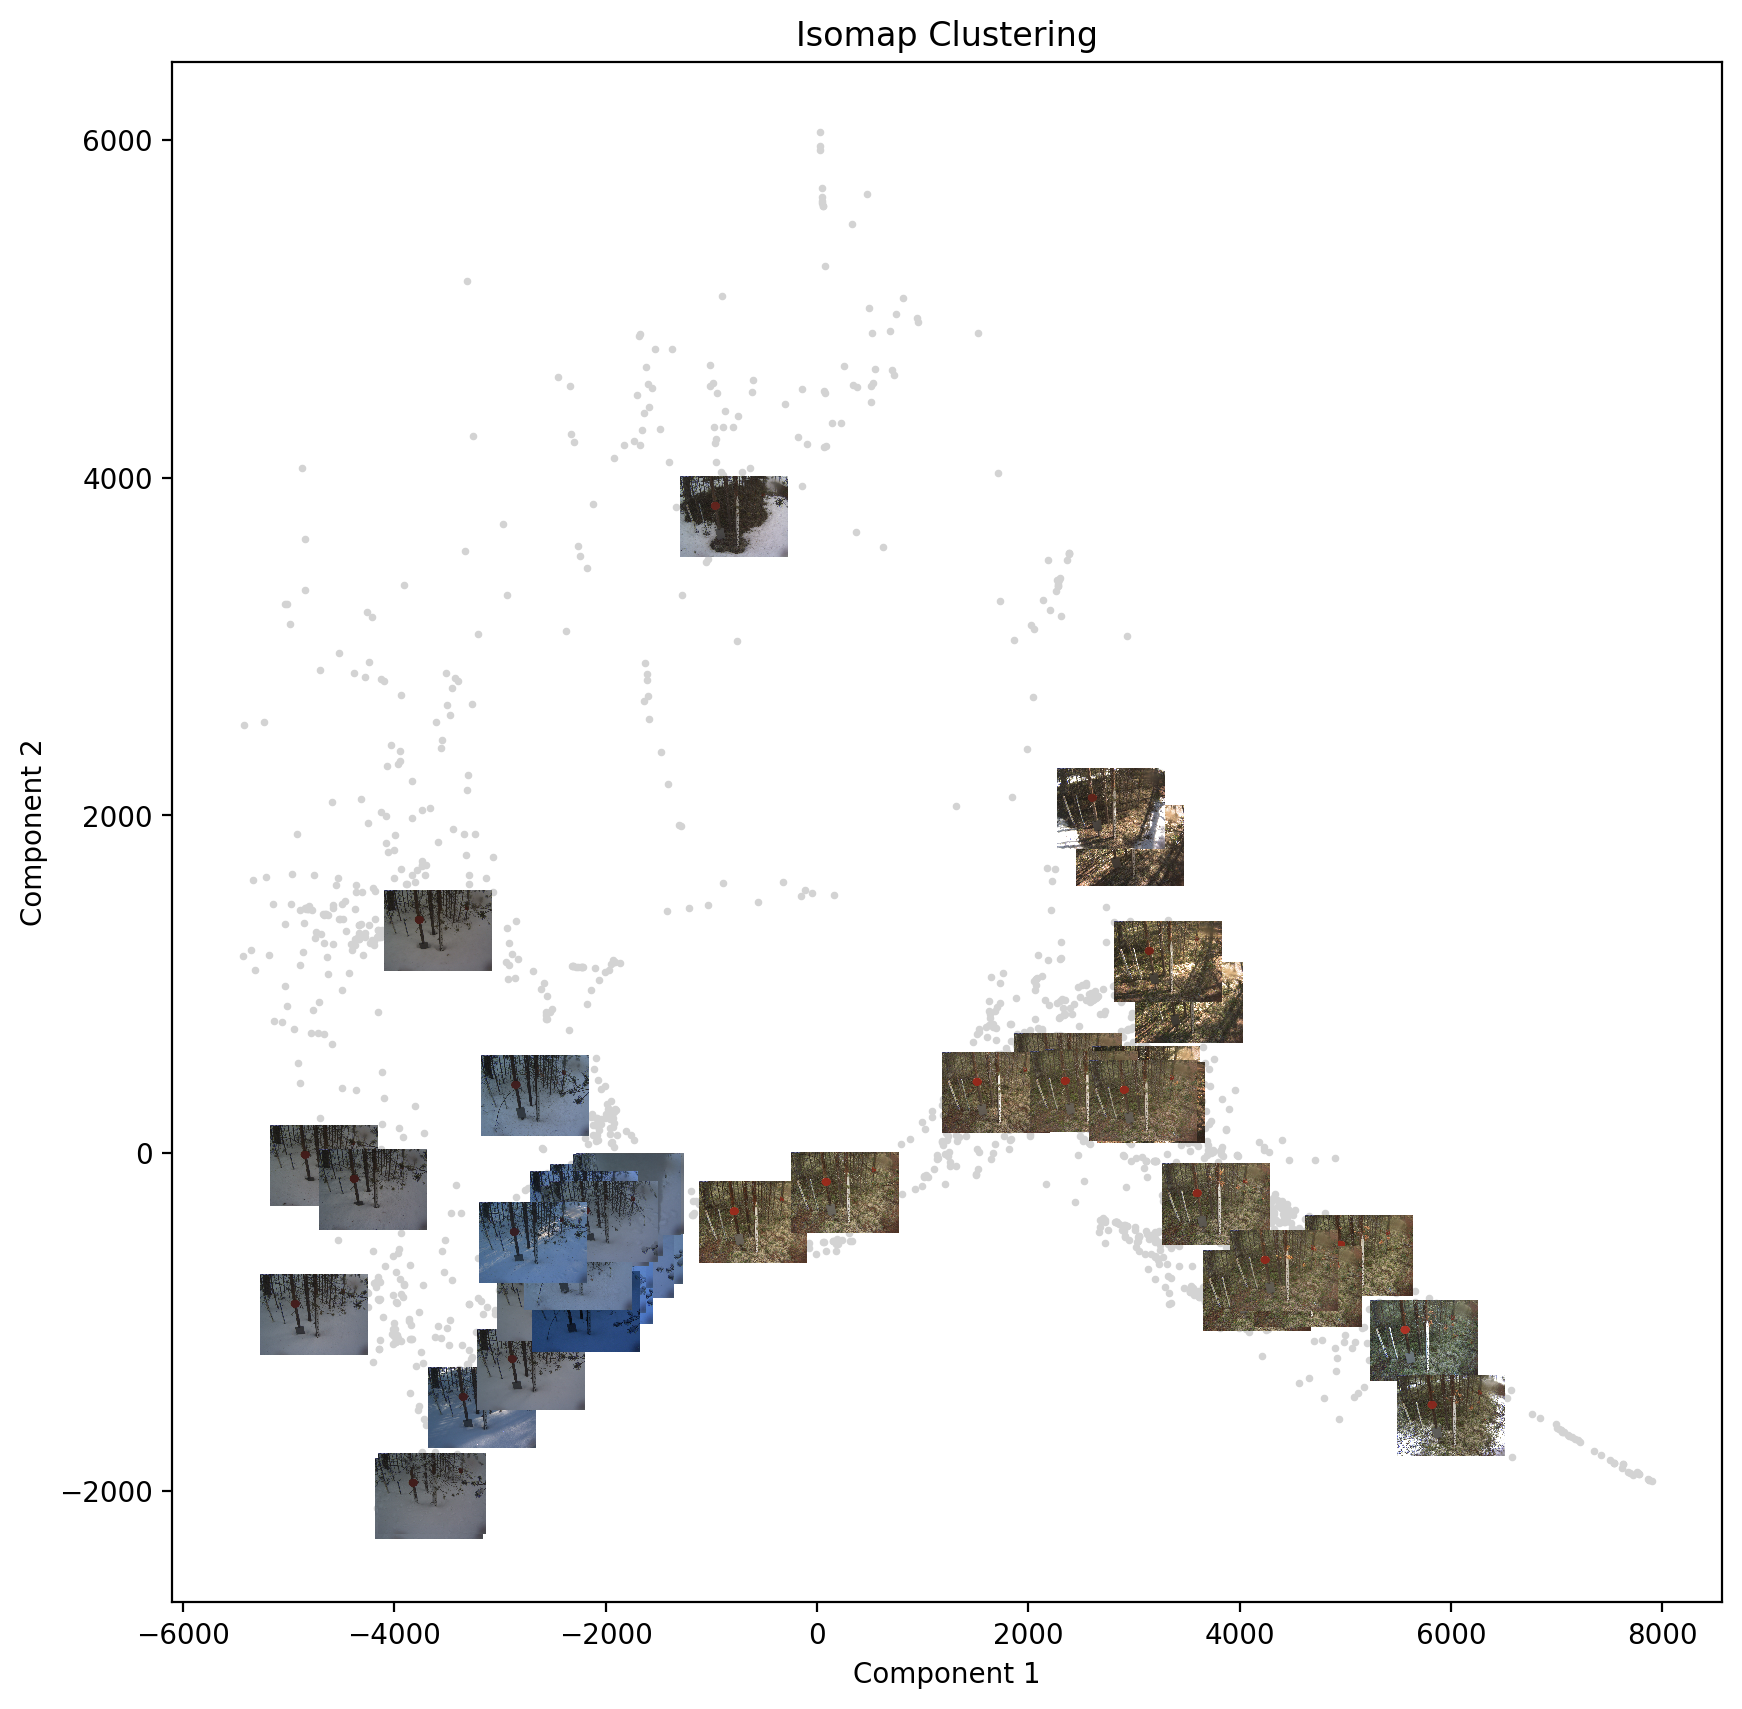

In [15]:
# Plot the embeddings
plot_embeddings(embeddings, image_paths_curated, num_samples=50)

# Probability Assignment through Trained Classification Model

Reading Images: 100%|██████████████████████████████████████████████████████████████| 3640/3640 [01:53<00:00, 32.18it/s]
C:\Users\s1803229\AppData\Local\miniforge-pypy3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 394ms/step - accuracy: 0.8880 - loss: 0.3486 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 27s 397ms/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 1.6264e-08
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 27s 398ms/step - accuracy: 1.0000 - loss: 2.6098e-06 - val_accuracy: 1.0000 - val_loss: 7.2048e-07
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 409ms/step - accuracy: 1.0000 - loss: 4.3933e-07 - val_accuracy: 1.0000 - val_loss: 5.3053e-08
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 419ms/step - accuracy: 1.0000 - loss: 1.4845e-07 - val_accuracy: 1.0000 - val_loss: 1.7591e-08
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 29s 431ms/step - accuracy: 1.0000 - loss: 6.2429e-08 - val_accuracy: 1.0000 - val_loss: 9.0620e-09
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 408ms/step - accuracy: 1.0000 - loss: 6.2359e-08 - val_accuracy: 1.0000 - val_loss: 5.7893e-09
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 408ms/step 

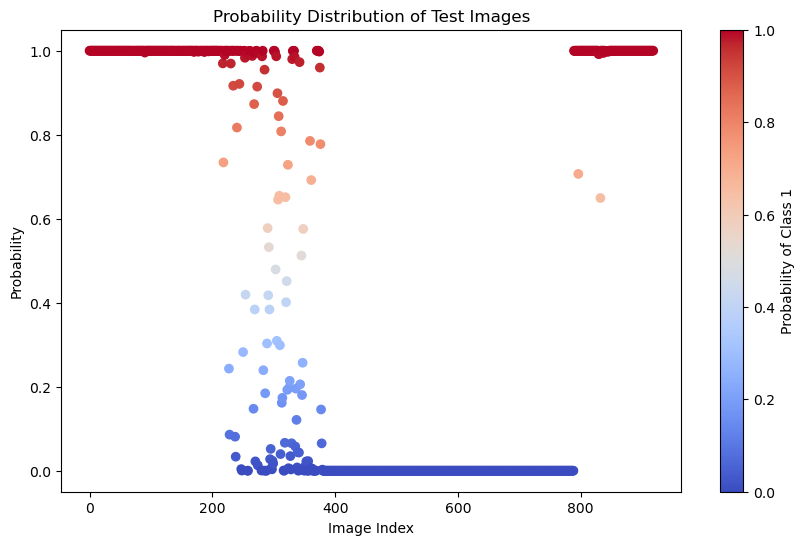

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image directories and paths
image_dir = '../data/sodankyla_cam/pine_ground_cam/'
image_paths_curated = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg') and filename.split('_')[-1][:2] in ['10', '11', '12', '13', '14']]
image_paths_curated.sort()

# Initialize arrays to store images and labels
fsc1_images = []
fsc0_images = []
test_images = []
labels_fsc1 = []
labels_fsc0 = []

# Read images into arrays based on specified conditions
for image_path in tqdm(image_paths_curated, desc='Reading Images'):
    image = load_img(image_path, target_size=(150, 150))
    image_array = img_to_array(image)
    if image_path.split('/')[-1].startswith(('sod_pin_ground_201901', 'sod_pin_ground_201902', 'sod_pin_ground_201903', 'sod_pin_ground_201911', 'sod_pin_ground_201912')):
        fsc1_images.append(image_array)
        labels_fsc1.append(1)
    elif image_path.split('/')[-1].startswith(('sod_pin_ground_201906', 'sod_pin_ground_201907', 'sod_pin_ground_201908', 'sod_pin_ground_201909')):
        fsc0_images.append(image_array)
        labels_fsc0.append(0)
    else:
        test_images.append(image_array)

# Convert lists to numpy arrays
fsc1_images = np.array(fsc1_images)
fsc0_images = np.array(fsc0_images)
test_images = np.array(test_images)
labels_fsc1 = np.array(labels_fsc1)
labels_fsc0 = np.array(labels_fsc0)

# Split data into training and validation sets
fsc1_train_images, fsc1_val_images, fsc1_train_labels, fsc1_val_labels = train_test_split(fsc1_images, labels_fsc1, test_size=0.2, random_state=42)
fsc0_train_images, fsc0_val_images, fsc0_train_labels, fsc0_val_labels = train_test_split(fsc0_images, labels_fsc0, test_size=0.2, random_state=42)

# Concatenate training data
train_images = np.concatenate((fsc1_train_images, fsc0_train_images), axis=0)
train_labels = np.concatenate((fsc1_train_labels, fsc0_train_labels), axis=0)

# Concatenate validation data
val_images = np.concatenate((fsc1_val_images, fsc0_val_images), axis=0)
val_labels = np.concatenate((fsc1_val_labels, fsc0_val_labels), axis=0)

# Normalize pixel values
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), verbose=1)

# Predict probabilities for test images
probabilities = model.predict(test_images)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(probabilities)), probabilities, c=probabilities, cmap='coolwarm')
plt.colorbar(label='Probability of Class 1')
plt.title('Probability Distribution of Test Images')
plt.xlabel('Image Index')
plt.ylabel('Probability')
plt.show()
